In [1]:
import random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Load MNIST dataset

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

## MNIST dataset properties

In [3]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


## Visualize MNIST examples

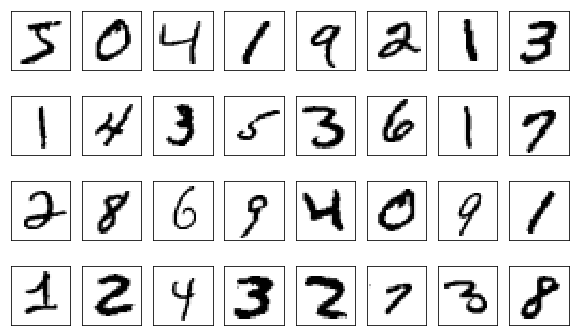

In [4]:
some_samples = X_train[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:], cmap='binary')
    plt.xticks(np.array([])), plt.yticks(np.array([]))
plt.show()

## Prepare dataset (vectorize)

In [5]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

## Function for embedding visualization

In [6]:
def draw_embeddings(X_embedded, targets, labels):
    plt.figure()
    for class_idx in range(np.max(targets)+1):
        X_embedded_class = X_embedded[targets == class_idx, :]
        plt.scatter(X_embedded_class[:,0], X_embedded_class[:,1])
    plt.legend(labels)
    plt.grid(True)

## Visualize embedding of a subset

In [7]:
data_for_viz = X_test[:1000, :]
labels_for_viz = y_test[:1000]

## PCA embedding

Wall time: 1.39 s


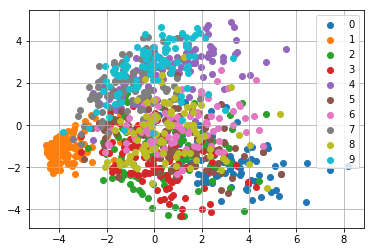

In [8]:
%%time

from sklearn.decomposition import PCA
X_embedded = PCA(n_components=2).fit_transform(data_for_viz)
draw_embeddings(X_embedded, labels_for_viz, list(range(10)))

## MDS embedding

Wall time: 54 s


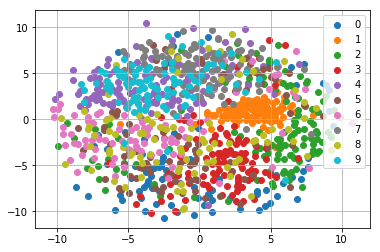

In [9]:
%%time

from sklearn.manifold import MDS
X_embedded = MDS(n_components=2).fit_transform(data_for_viz)
draw_embeddings(X_embedded, labels_for_viz, list(range(10)))

## t-SNE embedding

Wall time: 12.2 s


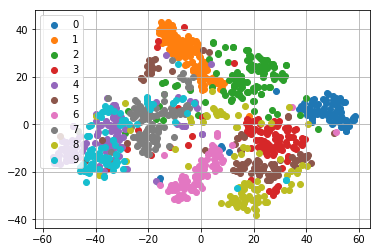

In [10]:
%%time

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(data_for_viz)
draw_embeddings(X_embedded, labels_for_viz, list(range(10)))

## Function for accuracy calculation

In [11]:
def calc_accuracy(y_true, y_result):
    return sum(y_test == y_test_result) / len(y_test)

## Random Forest

In [12]:
%%time

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_test_result = forest.predict(X_test)

acc = calc_accuracy(y_test, y_test_result)
print('Test accuracy: {} %'.format(acc*100))

Test accuracy: 96.76 %
Wall time: 47.9 s


## Test the model on a validation example

Prediction: [6]


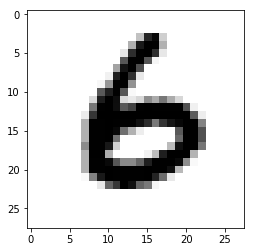

In [13]:
idx = random.randint(0, X_test.shape[0])
img = X_test[idx, :].reshape([28, 28])

plt.imshow(img, cmap='binary')

res = forest.predict(img.reshape([1, 28*28]))
print('Prediction: {}'.format(res))

## Test the model on my example

Prediction: [3]


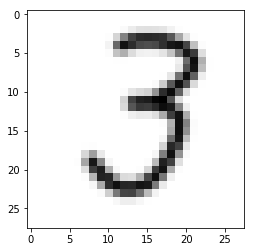

In [14]:
import imageio
from skimage.transform import resize

def load_and_prepare_image(fpath):
    img = imageio.imread(fpath, pilmode="RGB")
    img = img.astype(np.float32)/255
    img = resize(img, (28, 28), order=3, mode='reflect', anti_aliasing=True)
    img = 1. - img
    img = np.mean(img, axis=2)
    img = np.reshape(img, (28, 28))
    return img

img = load_and_prepare_image('../digit.png')
plt.imshow(img, cmap='binary')

res = forest.predict(img.reshape([1, 28*28]))
print('Prediction: {}'.format(res))

## Visualize embedding of my example

Wall time: 11.5 s


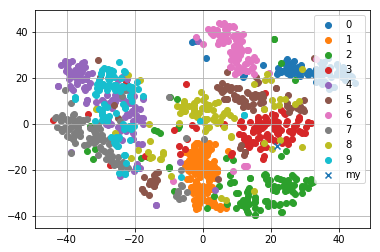

In [15]:
%%time

new_data = np.concatenate((data_for_viz, img.reshape([1, 28*28])), axis=0)
X_embedded = TSNE(n_components=2).fit_transform(new_data)

draw_embeddings(X_embedded[:-1,:], labels_for_viz, list(range(10)))

plt.scatter(X_embedded[-1, 0], X_embedded[-1, 1], marker='x')
new_target_names = np.concatenate((list(range(10)), ['my']))
plt.legend(new_target_names)